# Solan's Regression notebook

## Import the dataset

In [1]:
import pandas as pd

df = pd.read_csv("assets/houses.csv", sep=",")
df = df.set_index("id")
df

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition
id,,,,,,,,,,,,,,,,,
9306584,3770,HOUSE,MIXED_USE_BUILDING,500000.0,2,210.0,1,0,0,0,0,1,720,1689,4.0,0,GOOD
8939336,9690,HOUSE,HOUSE,169700.0,3,NaN,1,0,0,1,0,0,0,210,3.0,0,GOOD
9189042,7100,HOUSE,HOUSE,220000.0,3,NaN,0,0,0,0,0,0,0,199,3.0,0,GOOD
9313505,4000,HOUSE,APARTMENT_BLOCK,619000.0,6,406.0,1,0,0,1,7,0,0,0,2.0,0,TO_BE_DONE_UP
9428804,9000,HOUSE,HOUSE,312000.0,3,130.0,1,0,0,0,0,0,0,72,2.0,0,GOOD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9073336,6060,HOUSE,HOUSE,135000.0,2,140.0,1,0,0,1,10,1,100,160,2.0,0,GOOD
8553003,1420,HOUSE,VILLA,1950000.0,5,645.0,0,0,0,1,0,0,0,3215,4.0,0,AS_NEW
9173901,8630,HOUSE,HOUSE,295000.0,3,145.0,1,0,0,1,0,0,0,290,3.0,0,AS_NEW


## Clean the data

In [54]:
from utils.data_cleaners import clean_df, remove_outliers, transform_categorical_feature

datas = transform_categorical_feature(remove_outliers(clean_df(df)), "building_condition")

# Mean is 16 listing per location
# datas.groupby("location").count().mean()

house_count = datas.groupby("location").count().iloc[:,0:1].rename(columns={"type":"count"})
valid_loc = house_count[house_count["count"] >= 5].index.to_list()
datas = datas.loc[datas["location"].isin(valid_loc)]

# Mean is 23.5 per location
# test.groupby("location").count().mean()

datas = transform_categorical_feature(datas, "location")
datas = transform_categorical_feature(datas, "subtype")
datas

,type,price,room_number,area,kitchen_equipped,fireplace,terrace,garden,facade_count,swimming_pool,...,MANOR_HOUSE,MANSION,MIXED_USE_BUILDING,OTHER_PROPERTY,PAVILION,PENTHOUSE,SERVICE_FLAT,TOWN_HOUSE,TRIPLEX,VILLA
id,,,,,,,,,,,,,,,,,,,,,
9306584,HOUSE,500000.0,2,210.0,1,0,0,1,4.0,0,...,0,0,1,0,0,0,0,0,0,0
9428804,HOUSE,312000.0,3,130.0,1,0,0,0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
9163654,HOUSE,140000.0,2,153.0,1,0,1,0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
9396721,HOUSE,169000.0,2,75.0,1,0,1,0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
9433201,HOUSE,325000.0,4,241.0,1,0,0,0,2.0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9418040,HOUSE,449000.0,4,315.0,1,0,1,1,4.0,0,...,0,0,0,0,0,0,0,0,0,0
9374524,HOUSE,289000.0,3,177.0,1,0,1,1,3.0,0,...,0,0,0,0,0,0,0,0,0,0
9291580,HOUSE,295000.0,4,160.0,1,0,1,1,2.0,0,...,0,0,0,0,0,0,0,0,0,0


### Separate building by types

In [55]:
apt = datas.loc[datas.type == "APARTMENT"]
hse = datas.loc[datas.type == "HOUSE"]
hse.shape
apt.shape

(6609, 658)

## Multiple Linear Regression (Houses)
Start by splitting the set into test and training

In [4]:
from sklearn.model_selection import train_test_split

X = hse[["area", "room_number"]].to_numpy()

y = hse.price.to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

Initialize the regression and fit it to our training set

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print(f"Score: {lr.score(X_train, y_train)}")

Score: 0.31451426569141916


(6340, 1)

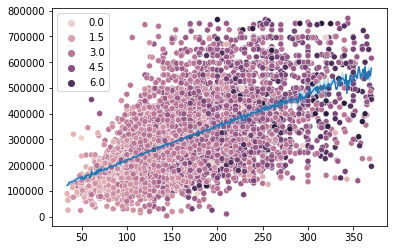

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=X_train[:, 0].reshape(-1), y=y_train.reshape(-1), hue=X_train[:, 1].reshape(-1))
sns.lineplot(x=X_train[:, 0].reshape(-1), y=lr.predict(X_train).reshape(-1))

lr.predict(X_train).shape

## Random Forest Regression (Houses)
Start by splitting the set into test and training

In [62]:
from sklearn.model_selection import train_test_split

X = hse.drop(columns=["type","price", "kitchen_equipped", "fireplace", "terrace", "garden", "facade_count", "swimming_pool"]).to_numpy()

y = hse.price.to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [63]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(
    n_estimators=2000,
    max_features=0.5,
    max_depth=12,
    min_samples_leaf=3
)

# Train the model on training data
rf.fit(X_train, y_train.reshape(-1,))

rf.score(X_test, y_test.reshape(-1,))

0.42254829718580744

array([174.,  88., 145., ..., 171., 200., 160.])

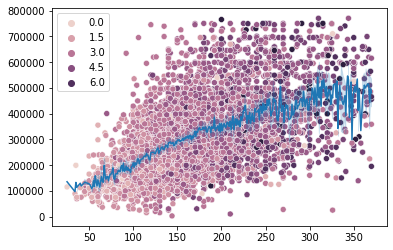

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=X_train[:, 1].reshape(-1), y=y_train.reshape(-1), hue=X_train[:, 0].reshape(-1))
sns.lineplot(x=X_train[:, 1].reshape(-1), y=rf.predict(X_train).reshape(-1))
X_train[:, 1].reshape(-1)

## Playground

Mainly for helping me visualize datas

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=datas, x="area", y="price", hue="room_number")

In [ ]:
apt = datas.loc[datas.type == "APARTMENT"]
hse = datas.loc[datas.type == "HOUSE"]

sns.scatterplot(data=apt, x="area", y="price", hue="room_number")

In [ ]:
sns.scatterplot(data=hse, x="area", y="price", hue="room_number")

In [66]:
hse.corrwith(hse.price)

location           -0.124131
price               1.000000
room_number         0.299654
area                0.533292
kitchen_equipped    0.022238
furnished           0.000794
fireplace           0.141325
terrace             0.097440
terrace_area        0.036447
garden              0.059815
garden_area         0.082312
land_surface        0.011372
facade_count        0.192111
swimming_pool       0.253489
dtype: float64